# Boston Housing Price Prediction

## Imports

In [1]:
import numpy as np
import os, sys
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

In [1]:
df = pd.read_csv('./data//housing.data', delim_whitespace=True, header=None)
df.head()

NameError: name 'pd' is not defined

In [3]:
col_name = ['CRIM', 'ZN' , 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df.columns = col_name
df.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2

| Code   | Description   |
|:---|:---|
|**CRIM** | per capita crime rate by town |
|**ZN**  | proportion of residential land zoned for lots over 25,000 sq.ft. | 
|**INDUS**  | proportion of non-retail business acres per town | 
|**CHAS**  | Charles River dummy variable (= 1 if tract bounds river; 0 otherwise) | 
|**NOX**  | nitric oxides concentration (parts per 10 million) | 
|**RM**  | average number of rooms per dwelling | 
|**AGE**  | proportion of owner-occupied units built prior to 1940 | 
|**DIS**  | weighted distances to five Boston employment centres | 
|**RAD**  | index of accessibility to radial highways | 
|**TAX**  | full-value property-tax rate per $10,000 | 
|**PTRATIO**  | pupil-teacher ratio by town | 
|**B**  | 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town | 
|**LSTAT**  | % lower status of the population | 
|**MEDV**  | Median value of owner-occupied homes in \$1000's | 

## Exploratory analysis

In [4]:
df.describe()

CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677082   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.105710    8.707259  168.537116    2.164946   91.294864   
min      2.900000    1.129600    1.000000  187.000000   12.600000    0.320000   
25%     45.025000    2.100175    4.000000  279.000000   17.400000  375.377500   
50%     77.500000    3.207450    5.000000  330.000000   19.050000  391.440000   
75%     94.075000    5.188425   24.000000  666.000000   20.200000  396.225000   
max    100.000000   12.126500   24.000000  711.000000   22.000000  396.900000   

            LSTAT        MEDV  
count  506.000000  506.000000  
mean    12.653063   22.532806  
std      7.141062    9.197104  
min      1.730000    5.000000  
25%      6.950000   17.025000  
50%     11.360000   21.200000  
75%     16.955000   25.000000  
max     37.970000   50.000000

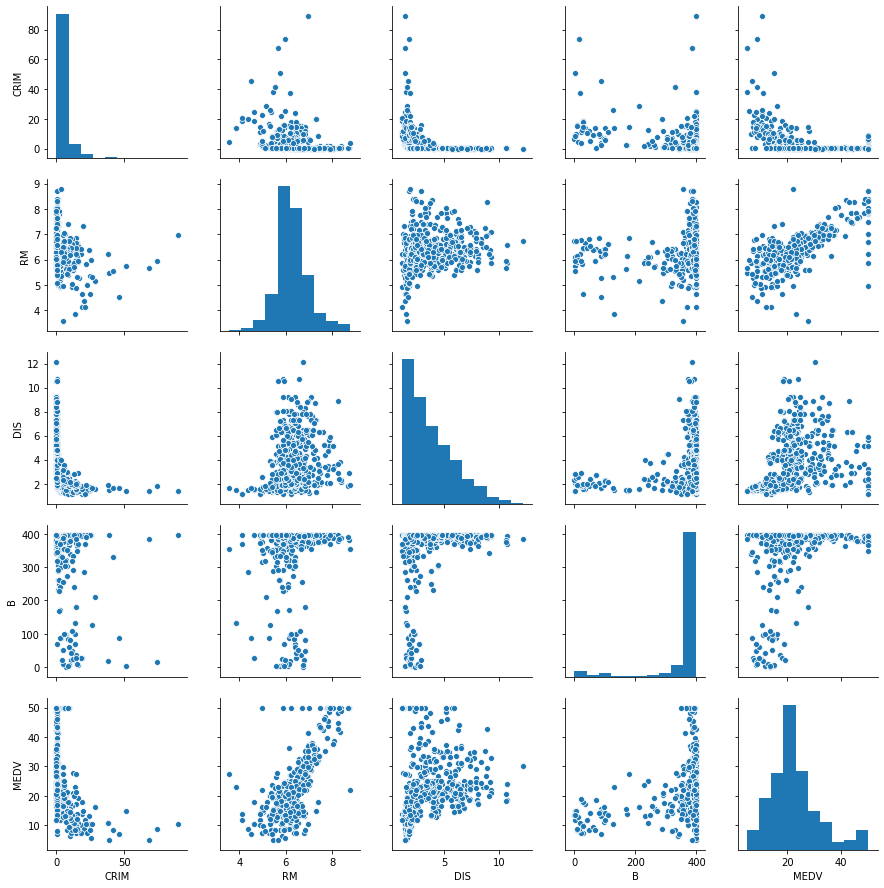

In [5]:
col_study = ['CRIM','RM','DIS','B','MEDV']
sns.pairplot(df[col_study])
plt.show()

## Correlation Analysis


In [6]:
df.corr()

CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
CRIM     1.000000 -0.200469  0.406583 -0.055892  0.420972 -0.219247  0.352734   
ZN      -0.200469  1.000000 -0.533828 -0.042697 -0.516604  0.311991 -0.569537   
INDUS    0.406583 -0.533828  1.000000  0.062938  0.763651 -0.391676  0.644779   
CHAS    -0.055892 -0.042697  0.062938  1.000000  0.091203  0.091251  0.086518   
NOX      0.420972 -0.516604  0.763651  0.091203  1.000000 -0.302188  0.731470   
RM      -0.219247  0.311991 -0.391676  0.091251 -0.302188  1.000000 -0.240265   
AGE      0.352734 -0.569537  0.644779  0.086518  0.731470 -0.240265  1.000000   
DIS     -0.379670  0.664408 -0.708027 -0.099176 -0.769230  0.205246 -0.747881   
RAD      0.625505 -0.311948  0.595129 -0.007368  0.611441 -0.209847  0.456022   
TAX      0.582764 -0.314563  0.720760 -0.035587  0.668023 -0.292048  0.506456   
PTRATIO  0.289946 -0.391679  0.383248 -0.121515  0.188933 -0.355501  0.261515   
B       -0.385064  0.175520 -0.356977  0.048788 -0.380051  0.128069 -0.273534   
LSTAT    0.455621 -0.412995  0.603800 -0.053929  0.590879 -0.613808  0.602339   
MEDV    -0.388305  0.360445 -0.483725  0.175260 -0.427321  0.695360 -0.376955   

              DIS       RAD       TAX   PTRATIO         B     LSTAT      MEDV  
CRIM    -0.379670  0.625505  0.582764  0.289946 -0.385064  0.455621 -0.388305  
ZN       0.664408 -0.311948 -0.314563 -0.391679  0.175520 -0.412995  0.360445  
INDUS   -0.708027  0.595129  0.720760  0.383248 -0.356977  0.603800 -0.483725  
CHAS    -0.099176 -0.007368 -0.035587 -0.121515  0.048788 -0.053929  0.175260  
NOX     -0.769230  0.611441  0.668023  0.188933 -0.380051  0.590879 -0.427321  
RM       0.205246 -0.209847 -0.292048 -0.355501  0.128069 -0.613808  0.695360  
AGE     -0.747881  0.456022  0.506456  0.261515 -0.273534  0.602339 -0.376955  
DIS      1.000000 -0.494588 -0.534432 -0.232471  0.291512 -0.496996  0.249929  
RAD     -0.494588  1.000000  0.910228  0.464741 -0.444413  0.488676 -0.381626  
TAX     -0.534432  0.910228  1.000000  0.460853 -0.441808  0.543993 -0.468536  
PTRATIO -0.232471  0.464741  0.460853  1.000000 -0.177383  0.374044 -0.507787  
B        0.291512 -0.444413 -0.441808 -0.177383  1.000000 -0.366087  0.333461  
LSTAT   -0.496996  0.488676  0.543993  0.374044 -0.366087  1.000000 -0.737663  
MEDV     0.249929 -0.381626 -0.468536 -0.507787  0.333461 -0.737663  1.000000

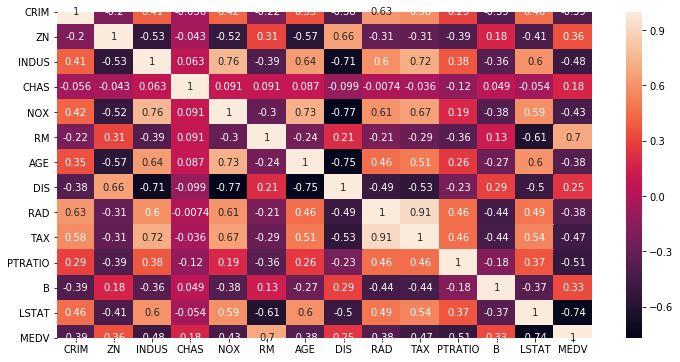

In [7]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(),annot=True)
plt.show()

## Preprocess data

In [8]:
from sklearn.model_selection import train_test_split
X = np.array(df['RM']).reshape(-1,1)
y = df['MEDV']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25)

## Linear Regression

In [9]:
# 1.
from sklearn.linear_model import LinearRegression
# 2.
lr = LinearRegression()
# 4.
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

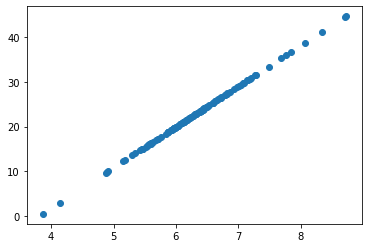

(<matplotlib.collections.PathCollection at 0x7f03e8225910>, None)

In [10]:
# 5.
y_pred_lr = lr.predict(X_test)
plt.scatter(X_test,y_pred_lr), plt.show()

In [11]:
a,b = lr.coef_[0], lr.intercept_
print('y = {} · x + {}'.format(a,b))

y = 9.105597061597235 · x + -34.73082574322618


## Robust Regression

In [12]:
# 1.
from sklearn.linear_model import RANSACRegressor
# 2. 
rr = RANSACRegressor()
# 4.
rr.fit(X_train,y_train)

RANSACRegressor(base_estimator=None, is_data_valid=None, is_model_valid=None,
                loss='absolute_loss', max_skips=inf, max_trials=100,
                min_samples=None, random_state=None, residual_threshold=None,
                stop_n_inliers=inf, stop_probability=0.99, stop_score=inf)

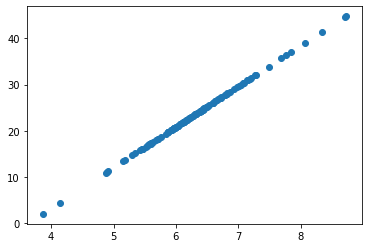

In [13]:
# 5.
y_pred_rr = rr.predict(X_test)
plt.scatter(X_test,y_pred_rr)

In [14]:
a,b = rr.estimator_.coef_[0], rr.estimator_.intercept_
print('y = {} · x + {}'.format(a,b))

y = 8.78748921580932 · x + -31.88812232995272


### Detection of Inliers and Outliers

In [15]:
inliers_mask = rr.inlier_mask_
outliers_mask = np.logical_not(inliers_mask)

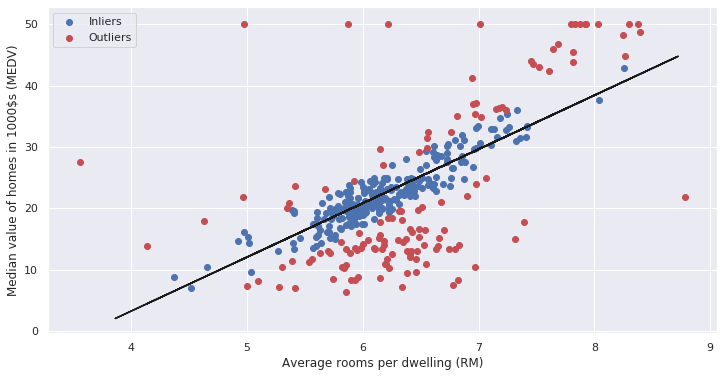

In [16]:
sns.set(style='darkgrid', context='notebook')
plt.figure(figsize=(12,6))
plt.scatter(X_train[inliers_mask],y_train[inliers_mask],c='b', label='Inliers')
plt.scatter(X_train[outliers_mask],y_train[outliers_mask],c='r',label='Outliers')
plt.plot(X_test,y_pred_rr,c='k')
plt.xlabel('Average rooms per dwelling (RM)')
plt.ylabel('Median value of homes in 1000$s (MEDV)')
plt.legend()
plt.show()

## Performance Evaluation

### Mean Squared Error

In [17]:
from sklearn.metrics import mean_squared_error
print('Linear Regression MSE:  {}'.format(mean_squared_error(y_test,y_pred_lr)))
print('Ransac Regression MSE:  {}'.format(mean_squared_error(y_test,y_pred_rr)))

Linear Regression MSE:  37.50914989025776
Ransac Regression MSE:  38.01458107412112


### Coefficient of determination R**2

In [18]:
from sklearn.metrics import r2_score
print('Linear Regression R2 score:  {} %'.format(r2_score(y_test,y_pred_lr)*100))
print('Ransac Regression R2 score:  {} %'.format(r2_score(y_test,y_pred_rr)*100))

Linear Regression R2 score:  55.013752554726615 %
Ransac Regression R2 score:  54.407568400450714 %


### Residual Analysis

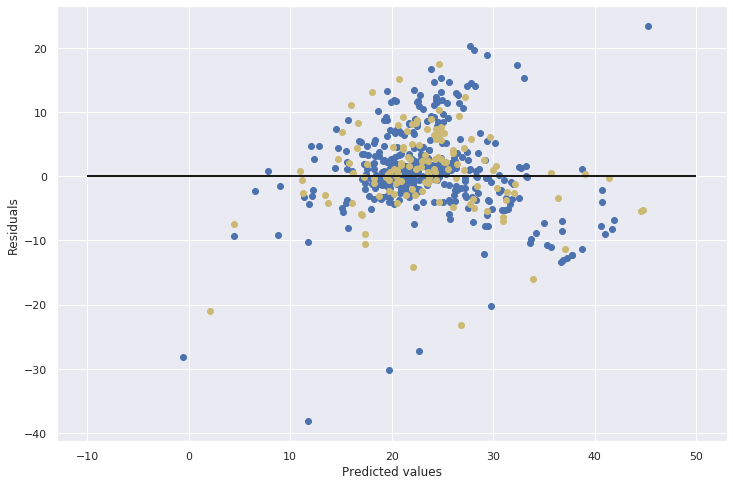

In [19]:
# for robust ransac regressor
y_train_pred_rr = rr.predict(X_train)
e_train_rr = y_train_pred_rr - y_train
e_test_rr = y_pred_rr - y_test

plt.figure(figsize=(12,8))
plt.scatter(y_train_pred_rr, e_train_rr , c='b', label='Training data')
plt.scatter(y_pred_rr, e_test_rr, c='y', label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.hlines(y=0, xmin=-10, xmax=50, lw=2, color='k')
# plt.xlim([-10, 50])
plt.show()

## Multiple Regression

In [34]:
import statsmodels.api as sm
X = df.drop(['MEDV'],axis=1)
X_constant = sm.add_constant(X)

mr = sm.OLS(y,X_constant) #Ordinary Least Squares
mr_ = mr.fit()
mr_.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Tue, 26 May 2020   Prob (F-statistic):          6.72e-135
Time:                        15:58:46   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4595      5.103      7.144      0.000      26.432      46.487
CRIM          -0.1080      0.033     -3.287      0.001      -0.173      -0.043
ZN             0.0464      0.014      3.382      0.001       0.019       0.073
INDUS          0.0206      0.061      0.334      0.738      -0.100       0.141
CHAS           2.6867      0.862      3.118      0.002       0.994       4.380
NOX          -17.7666      3.820     -4.651      0.000     -25.272     -10.262
RM             3.8099      0.418      9.116      0.000       2.989       4.631
AGE            0.0007      0.013      0.052      0.958      -0.025       0.027
DIS           -1.4756      0.199     -7.398      0.000      -1.867      -1.084
RAD            0.3060      0.066      4.613      0.000       0.176       0.436
TAX           -0.0123      0.004     -3.280      0.001      -0.020      -0.005
PTRATIO       -0.9527      0.131     -7.283      0.000      -1.210      -0.696
B              0.0093      0.003      3.467      0.001       0.004       0.015
LSTAT         -0.5248      0.051    -10.347      0.000      -0.624      -0.425
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                     1.51e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [37]:
import statsmodels.formula.api as smf
# initialize the model
# select some columns of the model
form_lr = smf.ols(formula='y ~ CRIM + RM + DIS + B', data=df)#.drop(['MEDV'],axis=1))
# fit
mlr = form_lr.fit()
# results
mlr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.571
Model:                            OLS   Adj. R-squared:                  0.567
Method:                 Least Squares   F-statistic:                     166.4
Date:                Tue, 26 May 2020   Prob (F-statistic):           1.56e-90
Time:                        16:00:19   Log-Likelihood:                -1626.4
No. Observations:                 506   AIC:                             3263.
Df Residuals:                     501   BIC:                             3284.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -35.4103      2.729    -12.975      0.000     -40.772     -30.049
CRIM          -0.1918      0.036     -5.336      0.000      -0.262      -0.121
RM             8.2835      0.397     20.889      0.000       7.504       9.063
DIS           -0.0072      0.141     -0.051      0.959      -0.285       0.271
B              0.0185      0.003      5.708      0.000       0.012       0.025
==============================================================================
Omnibus:                      205.845   Durbin-Watson:                   0.794
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1374.512
Skew:                           1.629   Prob(JB):                    3.38e-299
Kurtosis:                      10.388   Cond. No.                     3.77e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.77e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Polynomial Regression

Use linear models trained on nonlinear functions of the data. Maintains fast performance, and fits much wider range of data.

In [43]:
# 1.
from sklearn.preprocessing import PolynomialFeatures
# 2.
pr_3 = PolynomialFeatures(degree=3)
lr_3 = LinearRegression()
# 3.
X_DIS = np.array(df['DIS'])
y_NOX = df['NOX']
# 4.
X_DIS_pr = pr_3.fit_transform(X_DIS.reshape(-1,1))
lr_3.fit(X_DIS_pr, y_NOX)
# 5.
y_pred_lr = lr_3.predict(X_DIS_pr)

In [49]:
print('R2 score for cubic regression:  {:.2f} %'.format(r2_score(y_NOX,y_pred_lr)*100))

R2 score for cubic regression:  71.48 %
